In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import torch

from bert import tokenization
from dataloader import *
from bert_pytorch.model.bert import BERTClassificationWrapper
from tqdm import tqdm

vocab_file = './uncased_L-12_H-768_A-12/vocab.txt'
tokenizer = tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
for x, y, lengths in IMDBLoader(max_len=10, device=device, tokenizer=tokenizer).batch_iter(batch_size=2, train=True, shuffle=True):
    break

Length of (Train, Test) : (25000, 25000)


In [3]:
for x, y, lengths in tqdm(QQPLoader(max_len=10, device=device, tokenizer=tokenizer).batch_iter(batch_size=64, train=True, shuffle=True)):
    assert max(y) in [0, 1] and min(y) in [0, 1], (x, y, lengths)

0it [00:00, ?it/s]

Length of (Train, Test) : (363192, 40372)


90it [00:18,  5.05it/s]

nan


AttributeError: 'float' object has no attribute 'lower'

In [95]:
COLALoader(max_len=10, size=10, device=device, tokenizer=tokenizer).testdf.head()

Length of (Train, Test) : (10, 10)


,sentence_source,label,author_judged,sentence,file_length
477,w_80,1,NaN,John left us orders to follow Pete.,7
220,swb04,1,NaN,We gave ourselves to the cause.,6
185,s_97,1,NaN,I threw away a book that Sandy thought we had ...,11
320,swb04,1,NaN,The book surprised many people.,5
146,j_71,1,NaN,Neither Von Karajan's recording of Beethoven's...,17


In [4]:
for x, y, lengths in tqdm(QNLILoader(max_len=100, device=device, tokenizer=tokenizer).batch_iter(batch_size=128, train=False, shuffle=True)):
    assert max(y) in [0, 1] and min(y) in [0, 1], ("FAIL:", x, y, lengths)

1it [00:00,  8.29it/s]

Length of (Train, Test) : (103106, 5266)


40it [00:04,  8.23it/s]


In [115]:
for x, y, lengths in RTELoader(max_len=100, device=device, tokenizer=tokenizer).batch_iter(batch_size=2, train=True, shuffle=True):
    break

Length of (Train, Test) : (2490, 277)


In [133]:
for x, y, lengths in COLALoader(max_len=10, device=device, size=10, tokenizer=tokenizer).batch_iter(batch_size=2, train=False, shuffle=True):
    pass

Length of (Train, Test) : (10, 10)


In [135]:
lengths

[7, 8]

In [77]:
from train import accuracy

In [78]:
model = BERTClassificationWrapper(device,
                                len(tokenizer.vocab),
                                hidden=10,
                                n_layers=1,
                                attn_heads=1,
                                dropout=0.1,
                                number_classes=2,
                                attention_dropout=True)

In [134]:
y_hat = model(x, lengths)
y_preds = torch.softmax(y_hat, -1).squeeze()
y_preds

torch.Size([8, 2, 10])
torch.Size([8, 2, 10])


tensor([[0.4195, 0.5805],
        [0.4453, 0.5547]], grad_fn=<SqueezeBackward0>)

In [107]:
tmp = (y_preds >= torch.tensor([0.5])).cpu().numpy()
tmp

array([[0, 1],
       [0, 1]], dtype=uint8)

In [108]:
y

tensor([0, 1])

In [111]:
import numpy as np

In [113]:
(tmp[np.arange(len(y)), y] == 1).sum()

1

In [92]:
count = 0
for y_pred, y_true in zip(y_preds_t.split(1), y.split(1)):
    y_pred = y_pred.squeeze().nonzero().squeeze().detach().cpu().numpy()
    y_true = y_true.detach().cpu().numpy()
    count += 1 if y_pred == y_true else 0
count

1

In [43]:
torch.eq(y_preds_t, tmp_oh)

tensor([[1, 1],
        [0, 0]], dtype=torch.uint8)

In [61]:
w = []
for t in model.bert.transformer_blocks:
    w1 = t.input_sublayer.dropout_attention.layer_embedding
    w2 = t.output_sublayer.dropout_attention.layer_embedding
    w.append([w1, w2])

In [66]:
loss_fcn = torch.nn.CrossEntropyLoss()

In [79]:
y

tensor(0)

In [83]:
data = Path('../data/QQP')

In [85]:
df = pd.read_csv(data/'train.csv')

In [87]:
df['is_duplicate'].values

array([0., 1., 0., ..., 0., 0., 1.])

# Model + Data Loading

In [3]:
import pprint

import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pathlib import Path

from language_structure import *
from train import load, load_dataloader
from model import *
from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_file = './uncased_L-12_H-768_A-12/vocab.txt'
tokenizer = tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=True)

NameError: name 'tokenization' is not defined

In [122]:
model_path = 'cancel_e=0_itr=3default-model'
model1, optim, lang, m1 = load(model_path, cpu=True, load_model=False)
dataloader = load_dataloader(m1['args'], tokenizer)

Length of (Train, Test) : (25000, 25000)


Total Time: 30.3288 
Train Time: 28.5355
Max (Validation, Train): (0.00, 1.14)


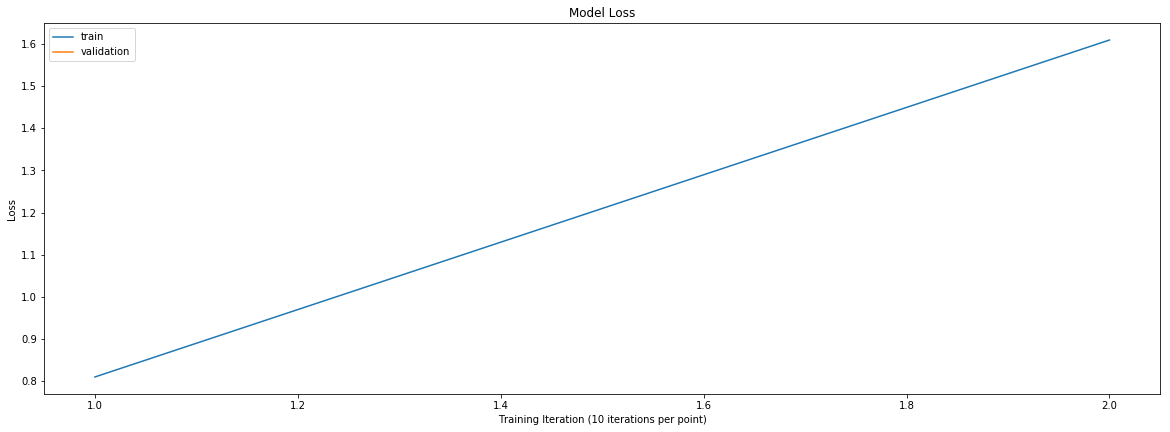

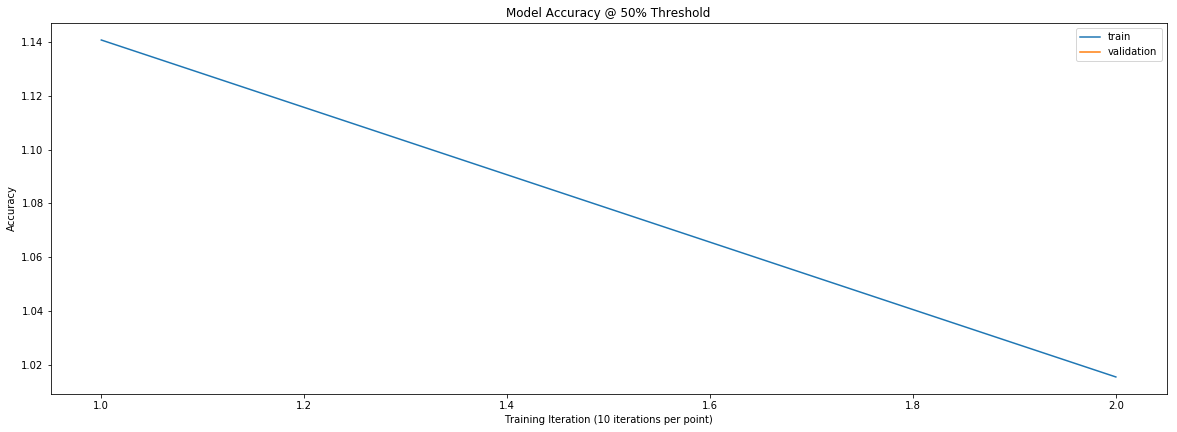

{   '--COLA': False,
    '--IMDB': True,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '128',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.3',
    '--dset-size': '0',
    '--embed-size': '256',
    '--help': False,
    '--hidden-size': '256',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '1',
    '--lr': '0.001',
    '--max-epoch': '30',
    '--max-sent-len': '10000',
    '--n-heads': '1',
    '--n-layers': '3',
    '--n-valid': '10000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'default-model',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '40'}


In [123]:
plot_metrics(m1, first_n=None)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m1['args'])

In [129]:
for x, y, lengths in RTELoader(max_len=100, device=device, tokenizer=tokenizer).batch_iter(batch_size=2, train=True, shuffle=True):
    pass

Length of (Train, Test) : (2488, 277)


In [117]:
data = Path('../data/RTE')

In [126]:
traindf = pd.read_csv(data/'train.csv')
testdf = pd.read_csv(data/'test.csv')

In [119]:
traindf.head()

,index,sentence1,sentence2,label,file_length,targets
0,0.0,No Weapons of Mass Destruction Found in Iraq Yet.,Weapons of Mass Destruction Found in Iraq.,not_entailment,18.0,0.0
1,1.0,"A place of sorrow, after Pope John Paul II die...",Pope Benedict XVI is the new leader of the Rom...,entailment,64.0,1.0
2,2.0,Herceptin was already approved to treat the si...,Herceptin can be used to treat breast cancer.,entailment,66.0,1.0
3,3.0,"Judie Vivian, chief executive at ProMedica, a ...",The previous name of Ho Chi Minh City was Saigon.,entailment,70.0,1.0
4,4.0,A man is due in court later charged with the m...,Paul Stewart Hutchinson is accused of having s...,not_entailment,152.0,0.0


In [128]:
len(testdf[testdf.isnull().any(axis=1)]), len(testdf)

(0, 277)

In [122]:
filtered_df = traindf[~traindf.isnull().any(axis=1)]
assert len(filtered_df) == (len(traindf) - len(traindf[traindf.isnull().any(axis=1)]))
traindf = filtered_df

In [124]:
traindf.to_csv(data/'train.csv')

# Units Dropped

In [4]:
seq_len = np.random.randint(15, 512)
hidden = 768 # bert hidden
batch_size = 16
x = torch.rand((seq_len, batch_size, hidden))

In [97]:
total_units = []
attention_drop = []
vanilla_drop = []
expected_drop = []
setups = []

batch_size = 1

for _ in range(100):
    p_drop = round(np.random.random(), 2)
    dropout = torch.nn.Dropout(p_drop)
    hidden = np.random.randint(300, 900) # bert hidden
    seq_len = np.random.randint(15, 512)
    
    x = torch.rand((seq_len, batch_size, hidden))
    setups.append([p_drop, seq_len, hidden])
    
    total_units.append(seq_len * hidden * batch_size)
    
    expected = p_drop * seq_len * hidden * batch_size
    expected_drop.append(expected)
    
    # attention dropout 
    drop_len = max(1, int(p_drop * seq_len))
    units_dropped = drop_len * hidden * batch_size
    attention_drop.append(units_dropped)
    
    # 5 test for consistency vanilla dropout
    dropout_dropped = []
    for _ in range(5):
        dropped_x = dropout(x.clone())
        units_dropped = int((1 - (x == dropped_x * (1-p_drop))).sum().cpu().numpy())
        dropout_dropped.append(units_dropped)
    vanilla_drop.append(dropout_dropped)

In [98]:
import matplotlib.pyplot as plt

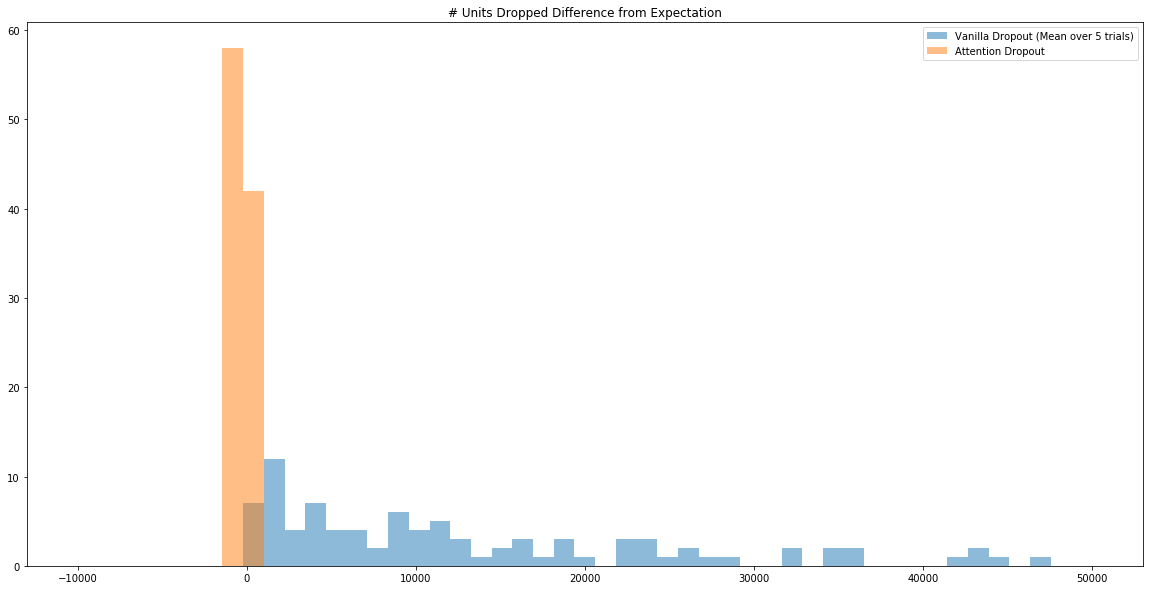

In [109]:
bins = np.linspace(-10000, 50000, 50)

x = [(sum(vd)/len(vd) - e) for vd, e in zip(vanilla_drop, expected_drop)]
y = [(ad - e) for ad, e in zip(attention_drop, expected_drop)]

assert len(x) == len(y)
plt.figure(figsize=(20, 10))
plt.hist(x, bins, alpha=0.5, label='Vanilla Dropout (Mean over 5 trials)')
plt.hist(y, bins, alpha=0.5, label='Attention Dropout')
plt.title('# Units Dropped Difference from Expectation')
plt.legend(loc='upper right')
plt.show()

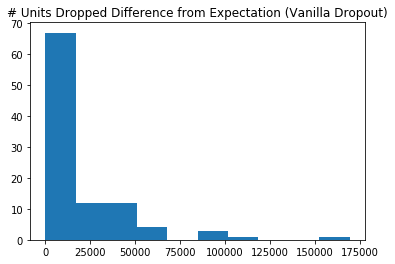

In [72]:
plt.hist([(sum(vd)/len(vd) - e) for vd, e in zip(vanilla_drop, expected_drop)])
plt.title('# Units Dropped Difference from Expectation (Vanilla Dropout)')
plt.show()

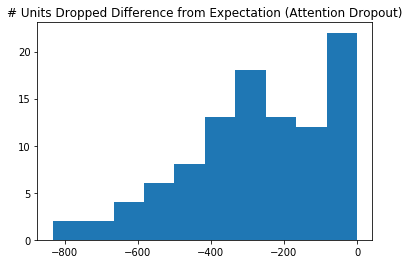

In [73]:
plt.hist([(ad - e) for ad, e in zip(attention_drop, expected_drop)])
plt.title('# Units Dropped Difference from Expectation (Attention Dropout)')
plt.show()

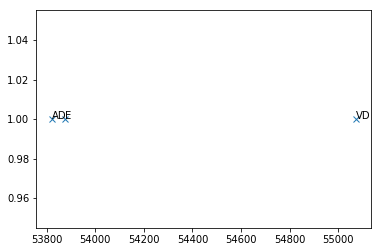

In [62]:
ar = (attention_drop[0], sum(vanilla_drop[0]) / len(vanilla_drop[0]), expected_drop[0])
labels = ['AD', 'VD', 'E']

fig, ax = plt.subplots()
ax.plot(ar, len(ar) * [1], "x")
for i, txt in enumerate(labels):
    ax.annotate(txt, (ar[i], 1))
plt.show()

In [38]:
for setup, total, ad, vd, ed in zip(setups, total_units, attention_drop, vanilla_drop, expected_drop):
    mean_vd = sum(vd) / len(vd)
    vd_against_expected = mean_vd - ed 
    ad_against_expected = ad - ed 
    print('(p_drop, seq_len, hidden) == ' + str(setup))
    print("Vanilla - E(drop): %.1f (%.2f of total units)" % (vd_against_expected, mean_vd/total))
    print("Attention - E(drop): %.1f (%.2f of total units)" % (ad_against_expected, ad/total))
    print('------------------------------')
    

(p_drop, seq_len, hidden) == [0.77, 169, 414]
Vanilla - E(drop): 1199.8 (0.79 of total units)
Attention - E(drop): -53.8 (0.77 of total units)
------------------------------
(p_drop, seq_len, hidden) == [0.43, 303, 526]
Vanilla - E(drop): 24920.9 (0.59 of total units)
Attention - E(drop): -152.5 (0.43 of total units)
------------------------------
(p_drop, seq_len, hidden) == [0.4, 85, 634]
Vanilla - E(drop): 6078.2 (0.51 of total units)
Attention - E(drop): 0.0 (0.40 of total units)
------------------------------
(p_drop, seq_len, hidden) == [0.77, 448, 319]
Vanilla - E(drop): 2315.2 (0.79 of total units)
Attention - E(drop): -306.2 (0.77 of total units)
------------------------------
(p_drop, seq_len, hidden) == [0.71, 341, 729]
Vanilla - E(drop): 20586.6 (0.79 of total units)
Attention - E(drop): -80.2 (0.71 of total units)
------------------------------
(p_drop, seq_len, hidden) == [0.68, 243, 869]
Vanilla - E(drop): 17515.2 (0.76 of total units)
Attention - E(drop): -208.6 (0.68 o

In [111]:
x = torch.tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]])
x.shape, x

(torch.Size([1, 10]),
 tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]))

In [112]:
torch.nn.functional.dropout(x, p=0.1) 

tensor([[ 1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,  8.8889,
         10.0000, 11.1111]])

In [113]:
x * (1. / (1. - 0.1))

tensor([[ 1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,  8.8889,
         10.0000, 11.1111]])

In [24]:
p_drop = 0.1
dropout = torch.nn.functional.dropout(x, p=0.1)

In [176]:
drop_len = max(1, int(p_drop * seq_len))
units_dropped = drop_len * hidden * batch_size
units_dropped

344064

In [174]:
dropped_x = x.clone()
dropped_x = dropout(dropped_x)

In [175]:
(1 - (x == dropped_x)).sum()

tensor(3538944)

In [177]:
# expected value
p_drop * seq_len * hidden * batch_size

353894.4